\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

As shown in the below q-q plots, daily log-returns of all 4 tickers have heavier tails than the normal distribution, but as time interval increases to monthly, log-returns become more normal, consistent with the stylized facts. Except GME, all daily log-returns have small autocorrelations, although for some lags they are outside of the 95% confidence interval. GME has larger autocorrelations, which is against Rama Cont's observation. There is a gains/loss asymmetry for all tickers except PFE. For all tickers the log-returns clearly have volatility clustering, which is again consistent with Rama Cont's observation. 

In [1]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 4.2 MB/s eta 0:00:01


In [2]:
import os
import sys
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import statsmodels as smm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns


In [3]:

def tsplot(y, lags=None, figsize=(10,8), style='bmh', title=None):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,1))
        qq_ax = plt.subplot2grid(layout, (1,0))
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ PLot')
        plt.tight_layout()
    return


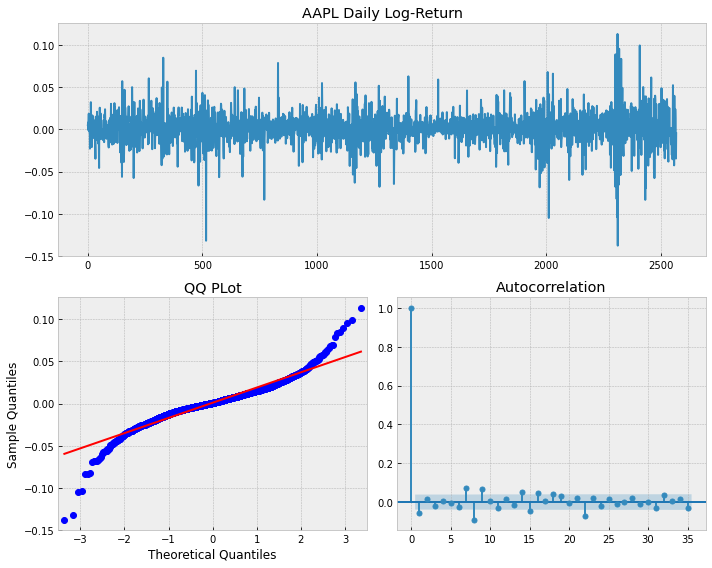

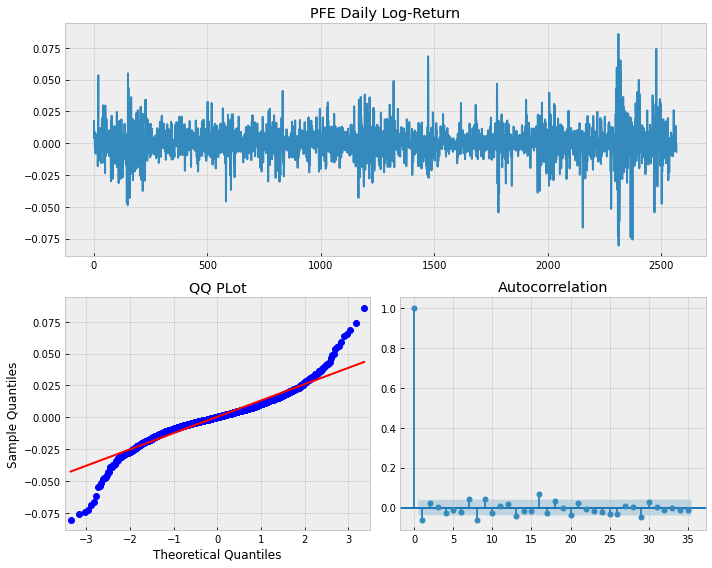

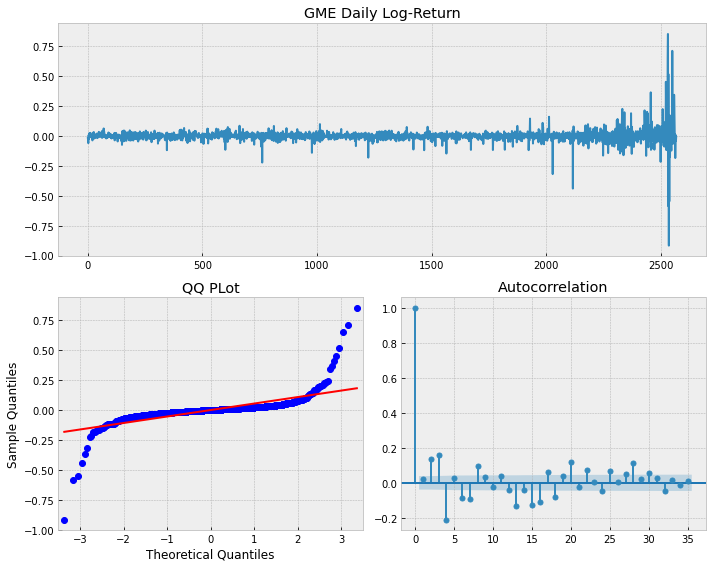

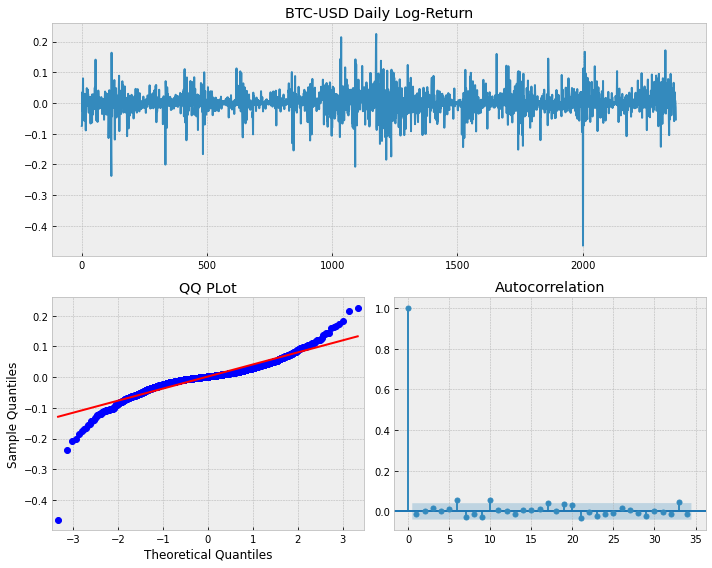

In [4]:
for ticker in ['aapl', 'pfe', 'gme', 'btc-usd']:
    start = '2011-01-01'
    end = '2021-03-21'
    price = pdr.get_data_yahoo(ticker,start,end)
    adjclose = price['Adj Close']
    shf = 1
    logret = np.log(adjclose/adjclose.shift(shf)).dropna()
    L = len(logret)
    LL = int(L/shf)
    logret_shf = np.zeros(LL)
    for i in range(int(L/shf)):
        logret_shf[i] = logret[i*shf]

    tsplot(logret_shf, title=f'{ticker.upper()} Daily Log-Return')
    plt.show()

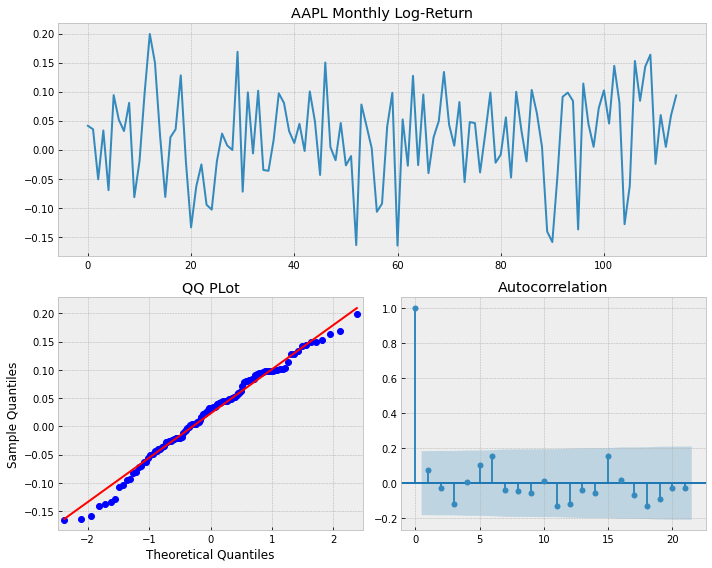

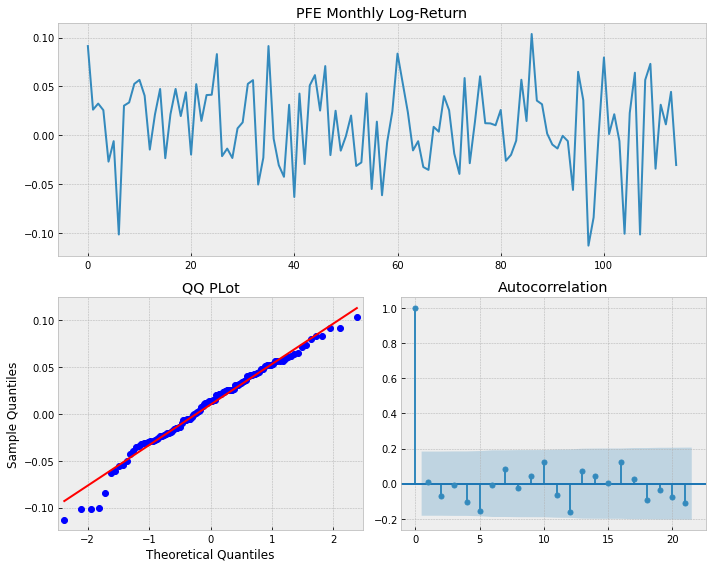

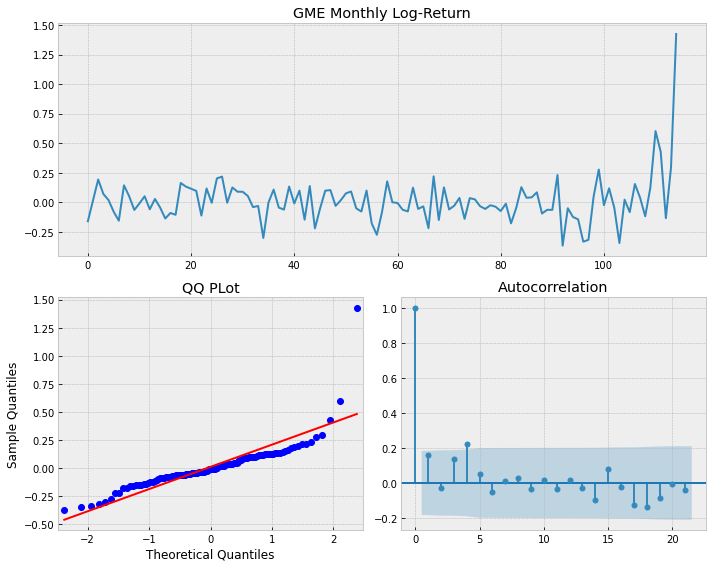

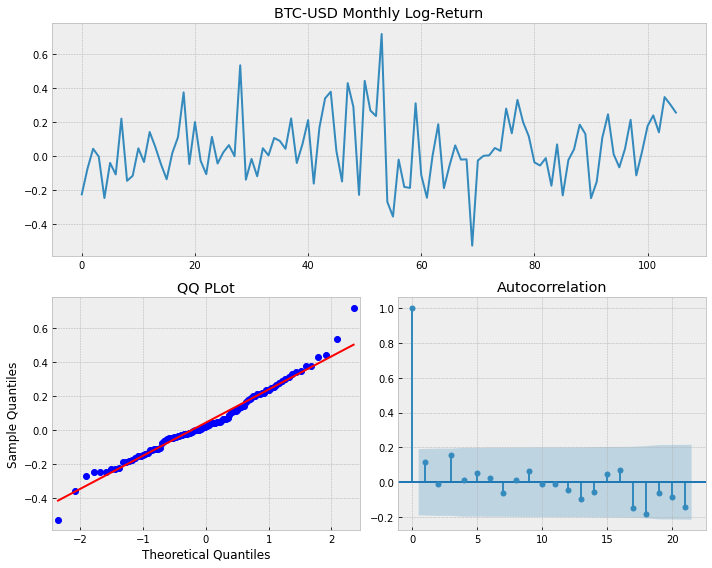

In [6]:
for ticker in ['aapl', 'pfe', 'gme', 'btc-usd']:
    start = '2011-01-01'
    end = '2021-03-21'
    price = pdr.get_data_yahoo(ticker,start,end)
    adjclose = price['Adj Close']
    shf = 22
    logret = np.log(adjclose/adjclose.shift(shf)).dropna()
    L = len(logret)
    LL = int(L/shf)
    logret_shf = np.zeros(LL)
    for i in range(int(L/shf)):
        logret_shf[i] = logret[i*shf]

    tsplot(logret_shf, title=f'{ticker.upper()} Monthly Log-Return')
    plt.show()

# 2. {-}

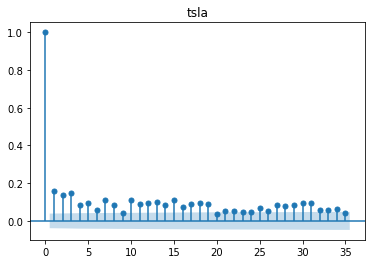

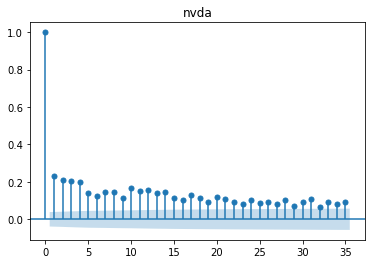

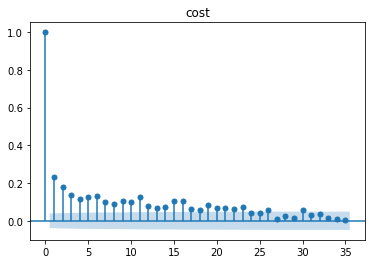

In [5]:
for ticker in ['tsla', 'nvda', 'cost']:
    start = '2011-01-01'
    end = '2021-03-21'
    price = pdr.get_data_yahoo(ticker,start,end)
    adjclose = price['Adj Close']
    shf = 1
    logret = np.log(adjclose/adjclose.shift(shf)).dropna()
    L = len(logret)
    LL = int(L/shf)
    logret_shf = np.zeros(LL)
    for i in range(int(L/shf)):
        logret_shf[i] = logret[i*shf]
    smt.graphics.plot_acf(np.abs(logret_shf), title=ticker, alpha = 0.05)
